In [1]:
from lightning_ocr.datasets.recog_text_dataset import RecogTextDataset

In [2]:
train_dataset = RecogTextDataset(
    data_root="/home/mixaill76/text_datasets/data_collection/005-CV",
    ann_file="ann_file.json",
    pipeline=[],
)

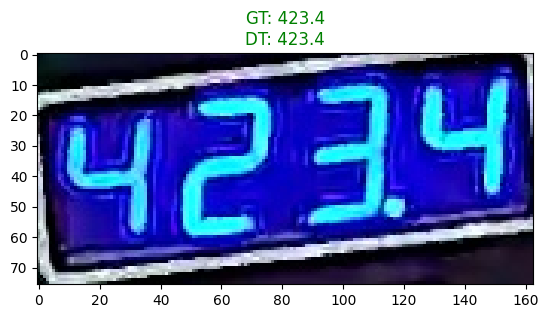

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def visualize_dataset(data_sample, show=False):
    data = cv2.imread(data_sample["filename"])
    fig, ax = plt.subplots()
    ax.imshow(data)
    title = [
        f"GT: {data_sample['gt_text']}"
    ]
    title_kargs = {}
    if "pred_text" in data_sample:
        title.append(f"DT: {data_sample['pred_text']}")
        if data_sample["pred_text"].strip() == data_sample["gt_text"].strip():
            title_kargs["color"] = "green"
        else:
            title_kargs["color"] = "red"
        
    ax.set_title("\n".join(title), **title_kargs)

    fig.canvas.draw()  # Draw the canvas, cache the renderer
    # Convert the canvas to a raw RGB buffer
    buf = fig.canvas.buffer_rgba()
    ncols, nrows = fig.canvas.get_width_height()
    image = np.frombuffer(buf, dtype=np.uint8).reshape(nrows, ncols, 4)
    image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
    
    if show:
        plt.show()

visualize_dataset(dict(train_dataset[0], **{"pred_text" : "423.4"}), show=True)